In [ ]:
import numpy as np
import pandas as pd
from google.colab import files
import io

In [ ]:
uploaded = files.upload()

Saving CreditDefault_training.csv to CreditDefault_training.csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['CreditDefault_training.csv']))

In [ ]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,50000,2,2,2,24,-1,-1,-1,-1,0,...,6561,5091,353,1572,1572,6561,102,353,27000,0
1,70000,2,2,2,24,0,0,0,0,0,...,64733,66680,71243,3000,3000,2500,3000,5800,0,0
2,420000,1,1,1,43,-2,-2,-2,-2,-2,...,2846,3027,5946,14274,8232,2853,3027,5946,32053,0
3,30000,1,2,3,53,1,-2,-1,2,0,...,3825,3825,0,0,4070,0,0,0,0,1
4,50000,2,2,1,49,1,2,2,2,0,...,21951,22287,22778,1000,3321,0,1000,1000,1001,0


In [ ]:
uploaded2 = files.upload()

Saving CreditDefault_Xtest.csv to CreditDefault_Xtest.csv


In [ ]:
df2 = pd.read_csv(io.BytesIO(uploaded2['CreditDefault_Xtest.csv']))

In [ ]:
X1 = df.drop('default.payment.next.month', axis=1)
y = df['default.payment.next.month']
print (X1)

      LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  PAY_4  \
0         50000    2          2         2   24     -1     -1     -1     -1   
1         70000    2          2         2   24      0      0      0      0   
2        420000    1          1         1   43     -2     -2     -2     -2   
3         30000    1          2         3   53      1     -2     -1      2   
4         50000    2          2         1   49      1      2      2      2   
...         ...  ...        ...       ...  ...    ...    ...    ...    ...   
3980     500000    2          2         1   40      0      0      0      0   
3981     390000    2          2         2   28     -1     -1     -1     -1   
3982     120000    2          2         2   29      1      2      0      0   
3983      80000    2          2         1   42      2      2      2      2   
3984     100000    2          3         1   43      2      2      0      0   

      PAY_5  ...  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  P

## Standardization and One-hot Encoding

Standardize the continuous features and convert categorical variables ('SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6') into dummy variables.<br>
Note the situation where not all repayment status categories (-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9) necessarily appear in the training dataset for variables 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'.

In [ ]:
catvariables = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
dummy_train = pd.DataFrame()
for column in catvariables:
  dummies = pd.get_dummies(df[column])
  dummy_train = pd.concat([dummies,dummy_train], axis = 1)
dummy_train.columns = dummy_train.columns.astype(str)

dummy_test = pd.DataFrame()
for column in catvariables:
  dummies = pd.get_dummies(df2[column])
  dummy_test = pd.concat([dummies,dummy_test], axis = 1)

In [ ]:
from sklearn.preprocessing import StandardScaler
numcol = pd.DataFrame()
numcol = X1.drop(['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'], axis=1).columns
scaler = StandardScaler()
traindf = pd.DataFrame(scaler.fit_transform(X1[numcol]))
traindf.columns = traindf.columns.astype(str)
testdf = pd.DataFrame(scaler.fit_transform(df2[numcol]))

In [ ]:
X = pd.concat([traindf, dummy_train], axis = 1)

**Splitting training data into training and validation set (70:30 ratio) (the code has been provided)**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

Print the shape of X_train, y_train, X_val

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)

(2789, 82)
(2789,)
(1196, 82)


## Logistic Regression

As previously mentioned, the scikit-learn classification API makes it easy to train a classifier.


Use LogisticRegression from sklearn.linear_model to make a logistic regression classifier.

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf = LogisticRegression(random_state=42, max_iter = 300).fit(X, y)
clf.predict(X_val)

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
ypred = clf.predict(X_val)
np.sum(ypred == 1)

165

Implement my_precision(), my_recall(), my_accuracy() by yourselves

In [ ]:
def my_precision(y, y_preds): #TP/(TP+FP)
    truep = sum((y == 1) & (y_preds == 1))
    falsep = sum((y == 0) & (y_preds == 1))
    precision = truep / (truep + falsep)
    return(precision)

def my_recall(y, y_preds): #TP/(TP+FN)
    truep = sum((y == 1) & (y_preds == 1))
    falsen = sum((y == 1) & (y_preds == 0))
    recall = truep / (truep + falsen)
    return(recall)


def my_accuracy(y, y_preds): #(TP+TN)/(TP+FP+FN+TN)
    truep = sum((y == 1) & (y_preds == 1))
    falsep = sum((y == 0) & (y_preds == 1))
    truen = sum((y == 0) & (y_preds == 0))
    falsen = sum((y == 1) & (y_preds == 0))
    accuracy = (truep + truen) / (truep + falsep + truen + falsen)
    return(accuracy)

Use your above functions to compute precision, recall, and accuracy of your model on validation set:

In [ ]:
print (my_precision(y_val, ypred))
print (my_recall(y_val, ypred))
print (my_accuracy(y_val, ypred))

0.6909090909090909
0.4222222222222222
0.8269230769230769


Q. Accuracy<br>
Ans - 0.8269

Q. Precision<br>
Ans - 0.690909

Q. Recall<br>
Ans - 0.42222

Q. Which metric (accuracy, precision, recall) is more appropriate and in what cases? Will there be scenarios where it is better to use precision than accuracy? Explain. <br>
Ans -  Precision is the most useful when we're deliberately trying to avoid false positives. These are cases where identifying something as a false positive comes with great cost. Recall is most useful when we're deliberately trying to avoid false negatives. These are cases where identifying something as a false negative comes with great cost (like fraud detection). Accuracy measures the overall predictive capability of the model, handling both false negatives and false positives.

Q. Which metric is suitable in this case? <br>
Ans - It seems that recall is the most suitable metric, since we are dealing with default and credit extension. If we misclassify a person as "unlikely to default", this could turn out to be a dangerous credit extension if they actually happen to be candidates likely to default on their loans. These false negatives might be a very costly error.

### ROC curve

Use roc_Curve from sklearn.metrics and use matplotlib.pyplot to plot the ROC curve. Use validation set to make predictions and to draw ROC curve.

Q. What is the AUC obtained?<br>
Ans -

(3,)


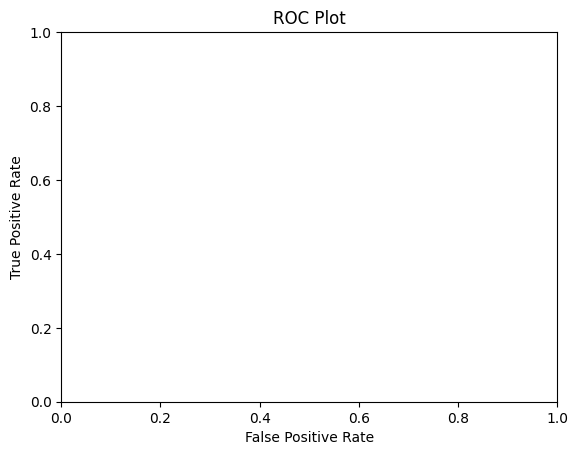

In [ ]:
# Plot the ROC curve by giving appropriate names for title and axes.
from sklearn.metrics import roc_curve
import sklearn.metrics as metrics

fpr, tpr, threshold = metrics.roc_curve(y_val, ypred)
print (tpr.shape)

import matplotlib.pyplot as plt
# Title Label
plt.title('ROC Plot')

# Axis Labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

## Hyperparameters

"Model tuning" refers to model adjustments to better fit the data, which is separate from "fitting" or "training" the model.

Build a model with hyperparameter 'C' set to 0.1 and penalty set to 'l1'. Make predictions on validation set and compute accuracy, precision and recall.

In [ ]:
newclf = LogisticRegression(C = 0.1, penalty = 'l1', solver = 'liblinear', random_state=42, max_iter = 300).fit(X, y)
y2 = newclf.predict(X_val)
print (my_precision(y_val, y2))
print (my_recall(y_val, y2))
print (my_accuracy(y_val, y2))

0.6826347305389222
0.4222222222222222
0.8252508361204013


Build a model with hyperparameter 'C' set to 0.5 and penalty set to 'l1'. Make predictions on validation set and compute accuracy, precision and recall.

In [ ]:
newclf2 = LogisticRegression(C = 0.5, penalty = 'l1', solver = 'liblinear', random_state=42, max_iter = 300).fit(X, y)
y3 = newclf2.predict(X_val)
print (my_precision(y_val, y3))
print (my_recall(y_val, y3))
print (my_accuracy(y_val, y3))

0.6867469879518072
0.4222222222222222
0.8260869565217391


Build a model with hyperparameter 'C' set to 0.1 and penalty set to 'l2'. Make predictions on validation set and compute accuracy, precision and recall.

In [ ]:
newclf3 = LogisticRegression(C = 0.1, penalty = 'l2', random_state=42, max_iter = 300).fit(X, y)
y4 = newclf3.predict(X_val)
print (my_precision(y_val, y4))
print (my_recall(y_val, y4))
print (my_accuracy(y_val, y4))

0.6848484848484848
0.4185185185185185
0.8252508361204013


Build a model with hyperparameter 'C' set to 0.5 and penalty set to 'l2'. Make predictions on validation set and compute accuracy, precision and recall. (Try to use a different solver or increase the number of iterations if there is a ConvergenceWarning)

In [ ]:
newclf4 = LogisticRegression(C = 0.5, penalty = 'l2', random_state=42, max_iter = 300).fit(X, y)
y5 = newclf4.predict(X_val)
print (my_precision(y_val, y5))
print (my_recall(y_val, y5))
print (my_accuracy(y_val, y5))

0.6848484848484848
0.4185185185185185
0.8252508361204013
